# Load Dependencies

In [4]:
#%matplotlib notebook
%matplotlib inline

#dependencies and setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# Files to Load

In [5]:
#Files to Load
cleaned_poverty_df = 'Cleaned_Data/cleaned_poverty_df.csv'
cleaned_unemployment_df = 'Cleaned_Data/cleaned_unemployment_df.csv'
cleaned_unemployment_rate_df = 'Cleaned_Data/cleaned_unemployment_rate_df.csv'
crime_df = 'Cleaned_Data/crime_df.csv'
crime_police_merged = 'Cleaned_Data/crime_police_merged.csv'
police_count_2014_2017_df = 'Cleaned_Data/police_count_2014_2017_df.csv'
police_df = 'Cleaned_Data/police_df.csv'
cleaned_ny_unemployment_rate = 'Cleaned_Data/cleaned_ny_unemployment_rate.csv'
cleaned_ohio_unemployment_rate = 'Cleaned_Data/cleaned_ohio_unemployment_rate.csv'

#Files to Read
cleaned_poverty_df = pd.read_csv(cleaned_poverty_df)
cleaned_unemployment_df = pd.read_csv(cleaned_unemployment_df)
cleaned_unemployment_rate_df = pd.read_csv(cleaned_unemployment_rate_df)
crime_df = pd.read_csv(crime_df)
crime_police_merged = pd.read_csv(crime_police_merged)
police_count_2014_2017_df = pd.read_csv(police_count_2014_2017_df)
police_df = pd.read_csv(police_df)
cleaned_ny_unemployment_rate = pd.read_csv(cleaned_ny_unemployment_rate)
cleaned_ohio_unemployment_rate = pd.read_csv(cleaned_ohio_unemployment_rate)


/Users/parinmody/Desktop/anaconda3/envs/PythonData/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# New York Crime Trend From 2014-2017

In [8]:
crime_df.head()

#create new dataframe with columns needed for line graph
df = pd.DataFrame(crime_df, columns = ['Year', 'State', 'Total Offender Count'])

#select only years 2014-2017
only_year_2014_2017_2 = (df["Year"] >= 2014) & (df["Year"] <= 2017)

crime_df_2 = df.loc[only_year_2014_2017_2]

#select only New York from the dataframe
only_newyork = crime_df_2.loc[crime_df_2["State"] == "New York", :]

#only_newyork.head()

#groupby the year
groupby_year_2 = only_newyork.groupby(["Year"])

#take the sum of total offender count after using groupby
crime_count_2014_2 = groupby_year_2["Total Offender Count"].sum()

#convert from series to dataframe
crime_count_2014_2 = pd.DataFrame(crime_count_2014_2)

#reset the index
crime_count_2014_2 = crime_count_2014_2.reset_index()
crime_count_2014_2


,Year,Total Offender Count
0,2014,626
1,2015,575
2,2016,628
3,2017,619


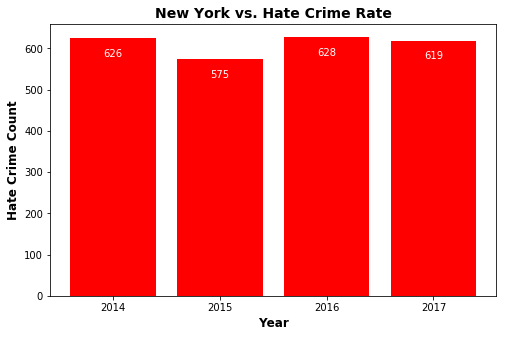

In [12]:
############################################### Graph #####################################################
#define plot area
plt.figure(figsize=(8,5))

#set the x axis
years = (crime_count_2014_2["Year"])

#set the y axis
crime = (crime_count_2014_2["Total Offender Count"])

#plot the bar graph for New York

bar_chart = plt.bar(years, crime, color="r", align="center")

def label_function(labels):
   for label in labels:
       height = label.get_height()
       label_position = height - 50
       plt.text(label.get_x() + label.get_width()/2., label_position,
                height, color='white', ha='center', va='bottom')

label_function(bar_chart)


#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#set labels
plt.title("New York vs. Hate Crime Rate", fontsize=14, fontweight = "bold")
plt.xlabel("Year", fontsize=12, fontweight = "bold")
plt.ylabel("Hate Crime Count", fontsize=12, fontweight = "bold")

#save figure
plt.savefig("Images/NY_CrimeRate.png")

In [10]:
cleaned_ny_unemployment_rate.head()

#create new dataframe with columns needed for line graph
ny_unemployment_rate = pd.DataFrame(cleaned_ny_unemployment_rate, columns = ["Date", "NY Unemployment Rate"])

#convert the  date to datetime to be able to extract year
ny_unemployment_rate['Date'] = pd.to_datetime(ny_unemployment_rate['Date'])

#only extract the year from the date column
ny_unemployment_rate['Date'] = ny_unemployment_rate['Date'].dt.year

#select only years 2014-2017
ny_2014_2017 = (ny_unemployment_rate["Date"] >= 2014) & (ny_unemployment_rate["Date"] <= 2017)

ny_2014_2017_1 = ny_unemployment_rate.loc[ny_2014_2017]

#groupby the year
ny_groupby_2014_2017 = ny_2014_2017_1.groupby(["Date"])

#take the average unemployment rate of each year 
ny_groupby_2014_2017 = ny_groupby_2014_2017["NY Unemployment Rate"].mean()

#create dataframe
ny_groupby_2014_2017 = pd.DataFrame(ny_groupby_2014_2017)

#reset the index
ny_groupby_2014_2017 = ny_groupby_2014_2017.reset_index()
ny_groupby_2014_2017

,Date,NY Unemployment Rate
0,2014,6.333333
1,2015,5.258333
2,2016,4.850000
3,2017,4.675000


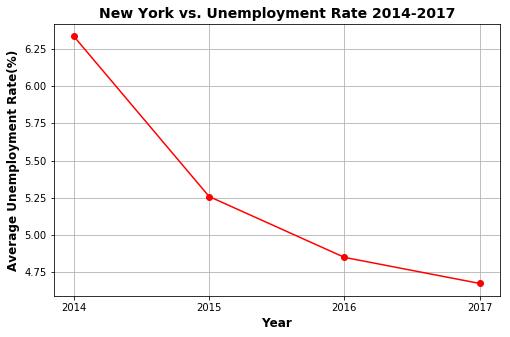

In [13]:
#create the line graph

#define plot area
plt.figure(figsize=(8,5))

#set X and Y axis
x_axis = ny_groupby_2014_2017["Date"]
y_axis = ny_groupby_2014_2017 ["NY Unemployment Rate"]

#set tick locations
plt.xticks(np.arange(min(years), max(years+1), 1.0))

#plot the line graph
ny_unemployment, = plt.plot(x_axis, y_axis, marker='o', color='r', label='New York')

#label the graph
plt.title("New York vs. Unemployment Rate 2014-2017", fontsize=14, fontweight = "bold")
plt.xlabel("Year", fontsize=12, fontweight = "bold")
plt.ylabel("Average Unemployment Rate(%)", fontsize=12, fontweight = "bold")
plt.grid()

#save figure
plt.savefig("Images/NY_UnemploymentRate.png")